In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
### misclassified files


vit_df = pd.read_csv('/media/joshua/Milano/galaxy_zoo_2/gz2_vit_09172021_0000_predictions.csv')
resnet_df = pd.read_csv('/media/joshua/Milano/galaxy_zoo_2/gz2_resnet50_A_predictions.csv')


In [7]:
resnet_df = resnet_df.rename(columns={"pred": "resnet_pred"})
resnet_df

,Unnamed: 0,GalaxyID,class,resnet_pred
0,0,267979,6,6
1,1,267781,2,2
2,2,5038,1,1
3,3,79150,5,5
4,4,117214,1,1
...,...,...,...,...
31186,31186,123523,3,3
31187,31187,165925,1,1
31188,31188,107687,1,1
31189,31189,173441,4,4


In [5]:
vit_df

,GalaxyID,class,pred
0,272777,5,5
1,207069,3,3
2,125110,5,5
3,206851,5,5
4,122722,0,0
...,...,...,...
31186,23693,4,4
31187,285854,6,3
31188,57768,0,0
31189,158163,0,0


In [14]:
df =  pd.merge(resnet_df, vit_df, how='inner', on = 'GalaxyID')

vit_good_df = df[df.class_x != df.resnet_pred]
vit_good_df = vit_good_df[vit_good_df.class_y == vit_good_df.pred]

In [20]:
vit_good_df 

,Unnamed: 0,GalaxyID,class_x,resnet_pred,class_y,pred
16,16,167048,5,0,5,5
56,56,137803,0,1,0,0
85,85,167570,1,5,1,1
104,104,232623,5,6,5,5
121,121,211828,1,5,1,1
...,...,...,...,...,...,...
31044,31044,78695,6,5,6,6
31070,31070,251879,5,7,5,5
31073,31073,196558,6,7,6,6
31154,31154,70952,1,6,1,1


image_id 167048
image_id: 167048 resnet prediction (wrong): [0] vit prediction (right): [5]


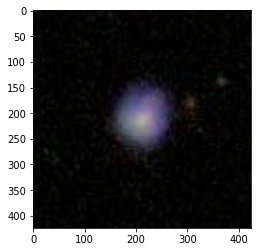

image_id 137803
image_id: 137803 resnet prediction (wrong): [1] vit prediction (right): [0]


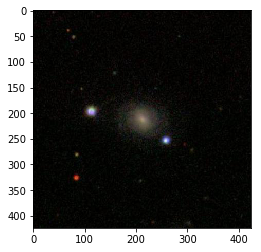

image_id 167570
image_id: 167570 resnet prediction (wrong): [5] vit prediction (right): [1]


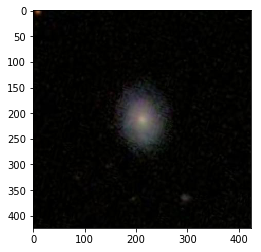

image_id 232623
image_id: 232623 resnet prediction (wrong): [6] vit prediction (right): [5]


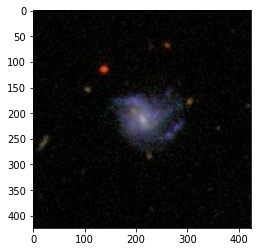

image_id 211828
image_id: 211828 resnet prediction (wrong): [5] vit prediction (right): [1]


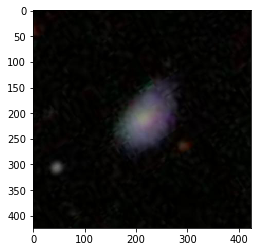

image_id 255991
image_id: 255991 resnet prediction (wrong): [2] vit prediction (right): [3]


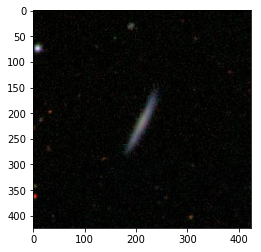

image_id 107781
image_id: 107781 resnet prediction (wrong): [4] vit prediction (right): [1]


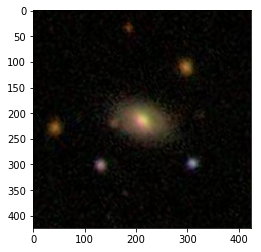

image_id 216114
image_id: 216114 resnet prediction (wrong): [6] vit prediction (right): [1]


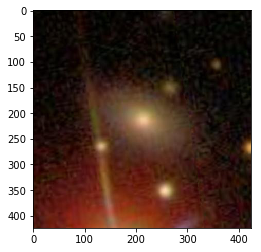

image_id 19824
image_id: 19824 resnet prediction (wrong): [5] vit prediction (right): [0]


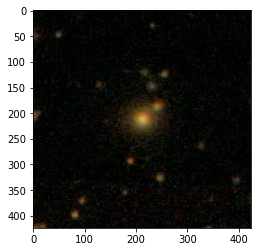

image_id 169712
image_id: 169712 resnet prediction (wrong): [6] vit prediction (right): [1]


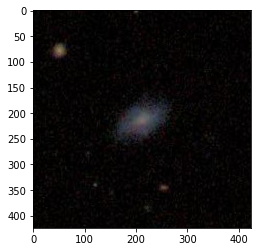

image_id 222940
image_id: 222940 resnet prediction (wrong): [6] vit prediction (right): [0]


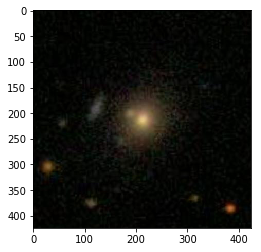

image_id 213788
image_id: 213788 resnet prediction (wrong): [2] vit prediction (right): [3]


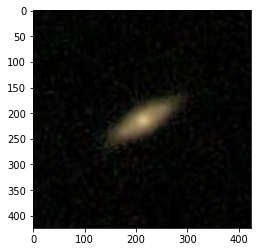

In [31]:
from PIL import Image

image_id_list = vit_good_df['GalaxyID']


for idx, image_id in enumerate(image_id_list):
    print("image_id", image_id)
    info = vit_good_df[vit_good_df.GalaxyID == image_id]
    resnet_pred = info['resnet_pred'].values
    truth = info['pred'].values
    print("image_id:", image_id, "resnet prediction (wrong):", resnet_pred, 'vit prediction (right):', truth)
    img = Image.open('/media/joshua/Milano/galaxy_zoo_2/images_gz2/images/' + str(image_id) + '.jpg')
    plt.imshow(img)
    plt.show()
    
    if idx > 10:  
        break
    